# Laboratorio 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos los mismos datos de diabetes vistos en la clase

In [14]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Pregunta 1

(1 pto)

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?
* ¿Crees que es necesario escalar o transformar los datos antes de comenzar el modelamiento?

__Respuesta:__

* Porque los valores se encuentran escalados y centrados por su desviación estandar multiplicada por la cantidad de muestras, entonces tienen una norma unitaria.
* La columna `target`
* Sí, para que el algoritmo los pueda reconocer más fácil y el usuario pueda comparar de manera más simple, ya que los datos vienen con escalas y magnitudes distintas.

## Pregunta 2

(1 pto)

Realiza dos regresiones lineales con todas las _features_, el primer caso incluyendo intercepto y el segundo sin intercepto. Luego obtén la predicción para así calcular el error cuadrático medio y coeficiente de determinación de cada uno de ellos.

In [8]:
regr_with_incerpet = linear_model.LinearRegression(fit_intercept=True)
regr_with_incerpet.fit(diabetes_X, diabetes_y)

LinearRegression()

In [9]:
diabetes_y_pred_with_intercept = regr_with_incerpet.predict(diabetes_X)

In [19]:
# Coeficientes
print(f"Coefficients: \n{regr_with_incerpet.coef_}\n")
# Intercepto
print(f"Intercept: \n{regr_with_incerpet.intercept_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_with_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_with_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Intercept: 
152.1334841628965

Mean squared error: 2859.69

Coefficient of determination: 0.52


In [20]:
regr_without_incerpet = linear_model.LinearRegression(fit_intercept=False)
regr_without_incerpet.fit(diabetes_X, diabetes_y)

LinearRegression(fit_intercept=False)

In [21]:
diabetes_y_pred_without_intercept =  regr_without_incerpet.predict(diabetes_X)

In [22]:
# Coeficientes
print(f"Coefficients: \n{regr_without_incerpet.coef_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_without_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_without_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Mean squared error: 26004.29

Coefficient of determination: -3.39


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

__Respuesta:__
No es muy bueno, ya que el coeficiente de determinación es 0.52 para el caso con intercepto, y para que sea una buena aproximación debería ser cercano a 1. Para el caso sin intercepto el R2 es negativo por lo que es mejor utilizar el promedio de los datos, ya que estos entregarían un mejor ajuste, además se debe considerar que el error es mucho mayor que para el caso con intercepto, entonces tampoco es un buen ajuste.

## Pregunta 3

(1 pto)

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [29]:
for col in diabetes_X.columns:
    X_i = diabetes_X[col].to_frame()
    regr_i = linear_model.LinearRegression(fit_intercept=True)
    regr_i.fit(X_i,diabetes_y)
    diabetes_y_pred_i = regr_i.predict(X_i)
    print(f"Feature: {col}")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_i):.2f}\n")

Feature: age
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

Feature: sex
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

Feature: bmi
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

Feature: bp
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19

Feature: s1
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04

Feature: s2
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.03

Feature: s3
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	Mean squared error: 5005.66
	Coefficient of determination: 0.16

Feature: s4
	Coefficients: 

**Pregunta: Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**Respuesta:** Escogería la Feature bmi, porque es la que tiene le menor error y el coeficiente de determinación más cercano a 1.

## Ejercicio 4

(1 pto)

Con la feature escogida en el ejercicio 3 realiza el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefieras.

In [32]:
regr = linear_model.LinearRegression(fit_intercept=True).fit(diabetes_X['bmi'].to_frame(), diabetes_y)
diabetes_y_pred_bmi = regr.predict(diabetes_X['bmi'].to_frame())  


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

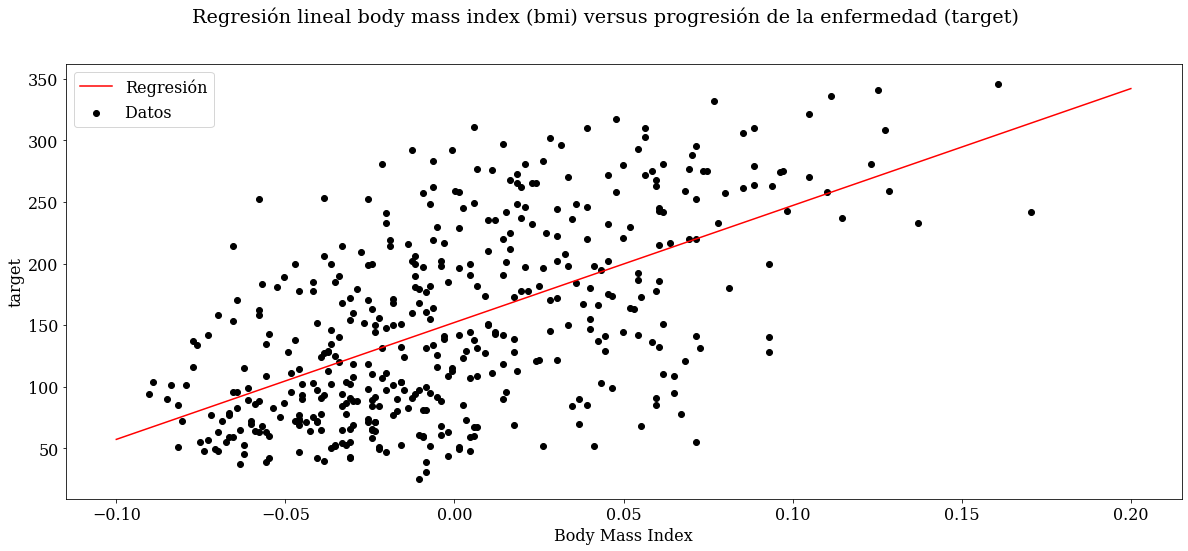

In [42]:
x = diabetes_X['bmi'].values
y = diabetes_y
x_reg = np.arange(-0.1, 0.2, 0.01)
y_reg = regr.intercept_ + regr.coef_ * x_reg

fig = plt.figure(figsize=(20,8))
fig.suptitle('Regresión lineal body mass index (bmi) versus progresión de la enfermedad (target)')
ax = fig.add_subplot()
ax.figsize=(20,8)
ax.scatter(x,y,c='k');
ax.plot(x_reg,y_reg,c='r');
ax.legend(["Regresión", "Datos "]);
ax.set_xlabel('Body Mass Index')
ax.set_ylabel('target');
